# Logistic regression in Python

 ## Introduction
This is my implementation of logistic regression for multiple datasets. In this lab, I will implement logistic regression for a dataset with one feature, then for a dataset with two features, and finally for a randomly chosen dataset found on the internet. I will compare the results of my implementation to logistic regression models implemented using scikit-learn.

We first start with importing useful python libraries:
- Numpy, a fundamental package for numerical computing in Python
- Pyplot, a library provides a convenient interface for creating various types of plots
- Scikit-learn is a popular machine learning library in Python that provides a wide range of tools for building and deploying machine learning models.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## Building the algorithm

We first start with writing some Python function that will help us build the Logistic regression algorithm

We start with the writing sigmoid function which is crucial in logistic regression because it enables the model to predict probabilities for binary classification tasks, ensuring that predictions fall within the appropriate range of 0 to 1. Its S-shaped curve allows for smooth transitions between classes, capturing non-linear relationships between features and the target variable, making logistic regression suitable for various classification problems, here's the form of the function

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

In Logistic regression we work with functions of type $$f_{w,b}(\mathbf{x}) = \sigma(\mathbf{w} \cdot \mathbf{x} + b)$$ 
w being here a m-sized 1D vector, m being the number of our features

In [64]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

For Logistic regression we work with a cost function of type $$J_{\mathbf{w,b}} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$ here we have $$\hat{y}_i  = f_{w,b}(\mathbf{x^{(i)}})$$ is the 
  is the predicted probability of the positive class (getting 1 as an output) for the
i-th sample.

In [113]:
def cost(w, b, X, Y): #here's the  cost function
    m = X.shape[0]
    f_w_b = sigmoid(np.dot(X, w) + b)
    cost = np.sum(Y * np.log(f_w_b) + (1 - Y) * np.log(1 - f_w_b))
    return -cost / m

## Logistic Gradient Descent


Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set   
* $\alpha$ is the learning rate
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = \sigma(z)$  
    where $g(z)$ is the sigmoid function:  
    $\sigma(z) = \frac{1}{1+e^{-z}}$   
    


In [130]:
def calculate_gradient(w,b,X,Y):
    m = X.shape[0]
    
    f_w_b = sigmoid(np.dot(X,w) + b)
    err = f_w_b - Y
    dj_b = np.sum(err) / m
    dj_w = np.dot(X.T, err) / m # This is equivalent of the sum formula above
    return dj_w, dj_b

Above we're using vectorized code that makes our code run 100x of times more faster

In [116]:
def logistic_regression(X,Y, alpha, iteration):
    m , n = X.shape
     
    w,b = np.zeros(n) , 0
    for _ in range(iteration):
        dj_w, dj_b = calculate_gradient(w,b,X,Y)
        w , b = w - alpha*dj_w , b- alpha*dj_b
        if _ % (iteration // 10) == 0:
            cst = cost(w,b,X,Y)
            print(f"iteration {_}, cost : {cst}")
    print(f"w : {w} and b : {b}")
    return w, b
        

## Logistic regression applied to a one feature dataset

Here the data set is manually typed

iteration 0, cost : 4.743490494219438
iteration 1000, cost : 1.2013083714131834
iteration 2000, cost : 0.8843375798459183
iteration 3000, cost : 0.7405025267319564
iteration 4000, cost : 0.6508529276449992
iteration 5000, cost : 0.5867399679029334
iteration 6000, cost : 0.5372899830195226
iteration 7000, cost : 0.49730765831397006
iteration 8000, cost : 0.4639311939875589
iteration 9000, cost : 0.4354229898021037
w : [[1.52400042 1.52400042 1.52400042 1.52400042 1.52400042 1.52400042
  1.52400042]] and b : -12.07086925520778


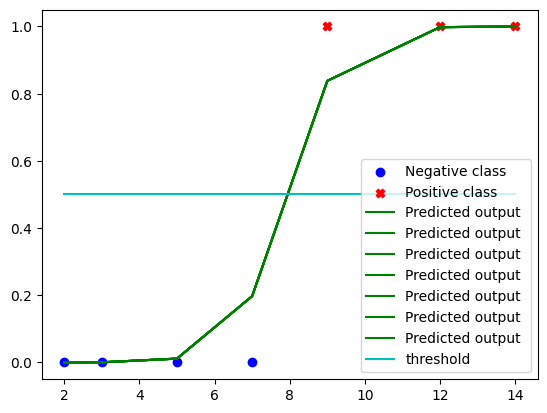

In [117]:
X_train1D = np.array([2, 3, 5, 7 , 9, 12, 14]).reshape(-1, 1)
y_train1D = np.array([0,0,0,0,1,1,1]).reshape(-1, 1)

w,b = logistic_regression(X_train1D, y_train1D, 0.01, 10000)
y_tild1D = sigmoid(w*X_train1D+b)
#We plot the data
plt.scatter(X_train1D[:4], y_train1D[:4] , c='b', marker = 'o', label="Negative class") 
plt.scatter(X_train1D[4:], y_train1D[4:] , c='r', marker = 'X', label="Positive class")

#Now we plot or sigmoid predicting function
plt.plot(X_train1D,y_tild1D, c="g" , label = "Predicted output ")
plt.plot(X_train1D, 0.5*np.ones(len(X_train1D)), c="c", label="threshold")

plt.legend()
plt.show()

Here with the small dataset we provided the predictions looks about right with a threshold of 0.5

## Logistic regression with a data set composed of two features (m=2)

Same with example before, here we manually type the data set

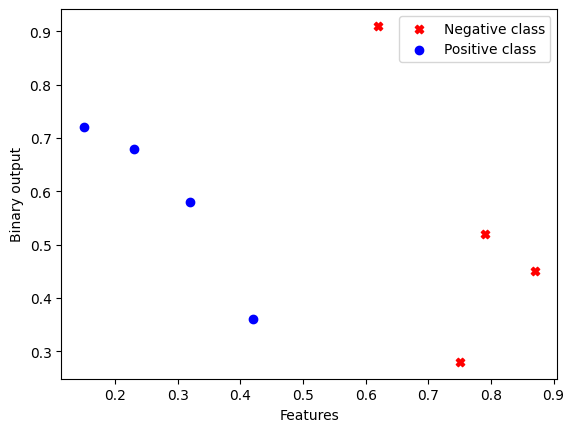

In [118]:
X_train = np.array([
    [0.23, 0.68],
    [0.75, 0.28],
    [0.32, 0.58],
    [0.62, 0.91],
    [0.15, 0.72],
    [0.87, 0.45],
    [0.42, 0.36],
    [0.79, 0.52]
])
y_train = np.array([1, 0, 1, 0, 1, 0, 1, 0])
X_1 = X_train[::2]
X_0 = X_train[1::2]

#We plot the data
plt.scatter(X_0[:,0] , X_0[:,1], c='r', marker = 'X', label="Negative class")
plt.scatter(X_1[:,0] , X_1[:,1], c='b', marker = 'o', label="Positive class")
plt.ylabel("Binary output")
plt.xlabel("Features")
plt.legend()
plt.show()

Here we can imagine a boundary that seperates the positive and negative class, mathematicaly we get the equation of this plot by setting $$f_{w,b}(x) = \frac{1}{1+e^{\mathbf{w} \cdot \mathbf{x} + b}} = 0.5 \iff \mathbf{w} \cdot \mathbf{x} + b = 0$$  let's try to plot this equation which represents the boundary limit

iteration 0, cost : 0.6930034621685337
iteration 10000, cost : 0.26537168745654394
iteration 20000, cost : 0.17243367532127202
iteration 30000, cost : 0.12754999250187382
iteration 40000, cost : 0.10090598189176808
iteration 50000, cost : 0.08335065995190406
iteration 60000, cost : 0.0709641114618036
iteration 70000, cost : 0.061780626493191756
iteration 80000, cost : 0.05471063925531575
iteration 90000, cost : 0.04910447592849562
w : [-15.36723672  -2.53935643] and b : 9.3873082508389


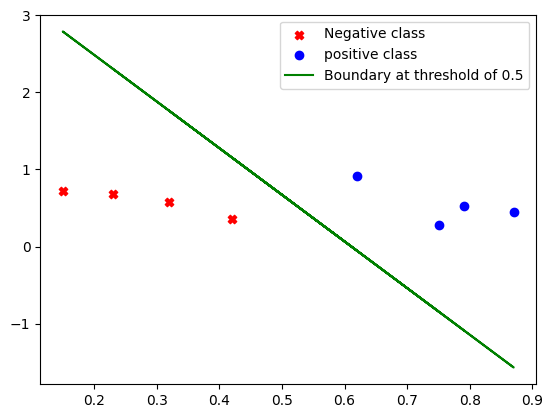

In [119]:
w,b = logistic_regression(X_train,y_train,0.01 , 100000)

w1,w2 = w[0],w[1]
X2_predicted = -(w1*X_train[:,0] + b)/w2 #Equation of our boundary limit at a threshold of 0.5 
plt.scatter(X_1[:,0] , X_1[:,1], c='r', marker = 'X', label="Negative class")
plt.scatter(X_0[:,0] , X_0[:,1], c='b', marker = 'o', label="positive class")
plt.plot(X_train[:,0] , X2_predicted, c="g", label = "Boundary at threshold of 0.5")
plt.legend()
plt.show()

Let's now try to repredict our training targets 

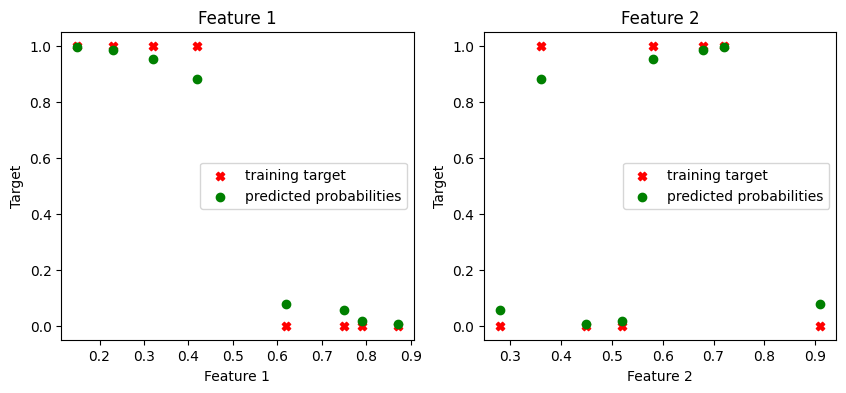

In [120]:
y_tild = sigmoid(np.dot(X_train,w) + b)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) 
plt.scatter(X_train[:,0] , y_train, c='r', marker = 'X', label='training target')
plt.scatter(X_train[:,0] , y_tild, c='g', marker = 'o', label='predicted probabilities')
plt.title('Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend(loc='center right')


plt.subplot(1, 2, 2) 
plt.scatter(X_train[:,1] , y_train, c='r', marker = 'X', label='training target')
plt.scatter(X_train[:,1] , y_tild, c='g', marker = 'o', label='predicted probabilities')
plt.title('Feature 2')
plt.xlabel('Feature 2')
plt.ylabel('Target')

plt.legend(loc='center right')
plt.show()

For the data we set, the model is rightly predicting the training set, lets calculate the accuracy of our model

In [121]:
def get_accuracy(threshold, y_train,y_tild):
    
    y_pred = (y_tild >= threshold).astype(int)
    accuracy = 100 * np.mean(y_train == y_pred)
    return accuracy, y_pred

In [122]:
# Convert probabilities to binary predictions using a threshold
threshold = 0.5
accuracy= get_accuracy(threshold , y_train, y_tild)[0]
print(f"The accuracy is {accuracy:0.2f}%")

The accuracy is 100.00%


We found an accuracy of 100% but that's due to our small and very 'clean' dataset, let's try it with a much larger data set

## Predict a Model to detect Person has Diabetes or Not

For this section I'll use a diabetes dataset I found on [Kaggle](https://www.kaggle.com/datasets/vikasukani/diabetes-data-set), first we import pandas which is a library that provides more powerful and flexible tools for data manipulation

In [73]:
import pandas as pd

We now import that data from the csv file within the same folder

In [123]:
df = pd.read_csv('diabetes-dataset.csv')
print(df)


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1    

Now we have the data we'll split it into our X_train and Y_train and we'll also skip the first row as it's not relevent for our training

In [124]:
df = pd.read_csv("diabetes-dataset.csv", skiprows= 0)

n = df.shape[1] # Number of columns
# Split the DataFrame into features (X) and target variable (y)
X = df.iloc[:, :n-1]  # Extract the first 7 columns as features
y = df.iloc[:, n-1]   # Extract the last column as target variable


# Convert X and y to NumPy arrays
X_train = X.values
y_train= y.values


Now that we have acquired the data, there is still one more issue to address: our data is not normalized, resulting in very large peak-to-peak values for different features. We did not normalize previous examples because the values were neither too large nor too small. However, let's proceed to normalize our data now using Z-score normalization.

The formula to calculate the Z-score for a feature $ x $ is:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $z$  is the standardized value (Z-score) of the feature.
- $x$ is the original value of the feature.
- $ \mu $ is the mean of the feature.
- $ \sigma $ is the standard deviation of the feature.

In [125]:
def z_score(X):
    mu = np.mean(X) # mean value 
    sigma = np.std(X) # standard deviation
    return mu, sigma

Now let's proceed with the normalization

In [129]:
mu,sigma = z_score(X_train)

X_normal = (X_train - mu)/sigma

w,b = logistic_regression(X_normal,y_train,0.01 , 200000)

iteration 0, cost : 0.6923776973828496
iteration 20000, cost : 0.49798732635901866
iteration 40000, cost : 0.49348721293081166
iteration 60000, cost : 0.4912217225289121
iteration 80000, cost : 0.4899187067873755
iteration 100000, cost : 0.4890669274360851
iteration 120000, cost : 0.48844631364788826
iteration 140000, cost : 0.4879570558889503
iteration 160000, cost : 0.4875513224446708
iteration 180000, cost : 0.48720459875344946
w : [ 3.51874184  1.9215279  -0.4883012   0.11407977 -0.05588125  4.26546581
 -0.01733556  1.27510406] and b : 0.6151673607453995


In [132]:
# Convert probabilities to binary predictions using a threshold
y_tild = sigmoid(np.dot(X_normal,w) + b)

threshold = 0.5
accuracy= get_accuracy(threshold , y_train, y_tild)[0]
print(f"The accuracy is {accuracy:0.2f}%")

The accuracy is 77.60%


The accuracy of our model is 77.6% for a threshold of 0.5, it's quite low but this is due to not having any form of feature engineering.

Now let's compare it to scikit-learn logestics regression

In [133]:
lr_model = LogisticRegression()

scaler = preprocessing.StandardScaler().fit(X_train) #we scale the data using Standardscaler from scikit-learn

X_scaled = scaler.transform(X_train)
lr_model.fit(X_scaled, y_train)

print(f"Accuracy on training set:{lr_model.score(X_scaled, y_train)*100}%")


Accuracy on training set:78.4%


We found an accuracy closer to ours, we can say that our model is fairly acceptable.